# Note 02: Hedging Interest Rate Risk with Principal Components 

In this notebook we use principal components as a tool to hedge interest rate risk.

The principal components analysis is a statistical technique which is used to explain the historical variation of yields. 

When yields change, the shape of the curve (the term structure) of the yields changes as well: the level of yields changes, or the slope of the curve changes, or the curvature changes, or all of them change.

#### Let's introduce a generic factor model before replacing it with a PC model.

A factor model assumes that the changes of the various parts on the yield curve, $dr_i$, are due to a set of common factors, $\phi_i$, where $\beta_{i,j}$ determines the impact of the variation that each of the factors $d\phi_i$ has on each individual change $dr_i$.

One approach could be to define the level, the slope and the curvature of the curve of yields as follows:

level($t$) = average of all yields, $\phi_1(t)$

slope($t$) = 10 year yield - 1 month yield, $\phi_2(t)$

curvature($t$) = - 1 month yield + 2 x 5 year yield - 10 year yield, $\phi_3(t)$

and estimate the following factor model

$$\Delta r_1(t) =\alpha_1 + \beta_{1,1}\Delta\phi_1(t) + \beta_{1,2}\Delta\phi_2(t) + \beta_{1,3}\Delta\phi_3(t) $$
$$\Delta r_2(t) =\alpha_2 + \beta_{2,1}\Delta\phi_1(t) + \beta_{2,2}\Delta\phi_2(t) + \beta_{2,3}\Delta\phi_3(t) $$
$$...$$
$$...$$
$$\Delta r_n(t) =\alpha_n + \beta_{n,1}\Delta\phi_1(t) + \beta_{n,2}\Delta\phi_2(t) + \beta_{n,3}\Delta\phi_3(t) $$
where
- $\Delta\phi_1(t)$ is the historical series of the changes in the level
- $\Delta\phi_2(t)$ is the historical series of the changes in the slope
- $\Delta\phi_3(t)$ is the historical series of the changes in the curvature
- $\Delta r_1(t)$ is the historical series of the changes in the 1 month rate
- $\Delta r_2(t)$ is the historical series of the changes in the 6 month rate

This is admittedly, very arbitrary !!

Why not to use a different set of points on the curve to define the slope and the curvature?

There is a more fundamental problem with this model. The level, slope and curvature changes are not independent of each other . When the level changes, so do the slope and the curvature.

Neverthless, a factor model allows us to introduce the concept of Factor Duration, which is needed when hedging with PCA too.


If we assume that only factor $j$ changes, $dr_i$ = $\beta_{i,j}$ $d\phi_j$, then $dr_i$ has an impact of the zero coupon bond price, and we compute the total sensitivity of the zero coupon bond price to changes in one factor only as follows:

$$\frac{dP(t,T_i)}{d\phi_j} = \frac{dP(t,T_i)}{dr_i} \frac{dr_i}{d\phi_j} = \frac{dP(t,T_i)}{dr_i}\beta_{i,j}$$
where 

- $\frac{dP(t,T_i)}{dr_i}$ is the standard duration definition
- $\frac{dr_i}{d\phi_j} = \beta_{i,j}$ is per above.

So now we have a formula for hedging purposes!

#### Let's replace this arbitrary set up with Principal Components!

The implementation of PCA begins with the variance-covariance matrix of $\Delta r_i(t)'s$, we call $M=Cov(\Delta r_i(t))$. 

The eigenvalues $\lambda$ and the eigenvectors $v$ associated to $M$ are extracted in a way that the following holds: 
$Mv_i=\lambda_iv_i$.

Let's order the eigenvalues, $\lambda_1>\lambda_2>..>\lambda_n$, together with their associated normalized eigenvectors $v_1>v_2>..>v_n$.

Now we replace the $level$ $\Delta\phi_1(t)$ in the factor model, with the following series $\Delta\phi_1^{PCA}(t)$, set as follows:

$$\Delta\phi_1^{PCA}(t) = \sum_{i=1}^n v_{i,k}\Delta r_k(t)$$

The following is also true

$$\phi_1^{PCA}(t) = \sum_{i=1}^n v_{i,k} r_k(t)$$

In a sense, we are doing exactly the following:

$$\Delta r_1(t) =\alpha_1 + \beta_{1,1}\Delta\phi_1^{PCA}(t) + \epsilon_1(t) $$
$$\Delta r_2(t) =\alpha_2 + \beta_{2,1}\Delta\phi_1^{PCA}(t) + \epsilon_2(t) $$
$$...$$
$$...$$
$$\Delta r_n(t) =\alpha_n + \beta_{n,1}\Delta\phi_1^{PCA}(t) + \epsilon_n(t) $$

where 
- $\beta_{k,1}=v_{1,k}$  

are exactly the eigenvector associated to $\lambda_1$ above, or the principal components as calculated by sklearn.decomposition.pca library.

Note that we use them to calculate the factor duration $\frac{dr_i}{d\phi_j^{PCA}} = \beta_{i,j}$.

Let's continue with the slope.

The $slope$ $\Delta\phi_2^{PCA}(t)$ is set as follows:

$$\Delta\phi_2^{PCA}(t) = \sum_{i=1}^n v_{i,k}\epsilon_k(t)$$

where $\epsilon_1(t), \epsilon_2(t),...,\epsilon_n(t)$ are the variations in the various rates that the first PC, $\Delta\phi_1^{PCA}(t)$ is not able to capture:

$$\epsilon_i(t)=\Delta r_i(t) - \alpha_1 - \beta_{i,1}\Delta\phi_1^{PCA}(t) $$

So now we can get the historical time series of the slope based on a statistical analysis.

As with the first component, we are doing excatly the following, once the second component is found:

$$\Delta r_1(t) =\alpha_1 + \beta_{1,1}\Delta\phi_1^{PCA}(t) + \beta_{1,2}\Delta\phi_2^{PCA}(t) + \epsilon_1(t) $$
$$\Delta r_2(t) =\alpha_2 + \beta_{2,1}\Delta\phi_1^{PCA}(t) + \beta_{2,2}\Delta\phi_2^{PCA}(t) + \epsilon_2(t) $$
$$...$$
$$...$$
$$\Delta r_n(t) =\alpha_n + \beta_{n,1}\Delta\phi_1^{PCA}(t) + \beta_{n,2}\Delta\phi_2^{PCA}(t) + \epsilon_n(t) $$

And this carries on for the third component.

The advantage of proceeding with Principal Components is that we build both the historical series of the level, curvature and slope of yield curve (and their changes), without any arbitrary choice. The only choice we have to make is how back in time we want to go before running the PCA. A choice that we had to do with a factor model anyway. 

### Plan
The way we continue is:
1. First, we calculate the principal components of our data set with sklearn.decomposition.pca library.
2. We use the principal components to hedge the change of level, slope and curvature of yields arising from a long position in a coupon bond. The hedges are three zero coupon bonds. We call this strategy, PCA hedging.
3. We then compare the PCA hedging strategy with a more mainstream hedging where instead we hedge the duration and convexity of the same coupon bond with two zero coupon bonds.
4. Lastly we show how to use principal components to explain a large variation of cross-section of yields.

We do not cover how the actual calculation of PCA is carried out, as we use sklearn.decomposition.pca library. If you are interested in the steps, you should consult our previous note "PrincipalComponents_of_Volatility_of_ForwardRates.ipynb" in this series.    

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.decomposition.pca as PCA
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Read our data set

In [2]:
dataframe    =  pd.DataFrame.from_csv('SpotRatesData.csv')
print (dataframe.shape)

(512, 10)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
dataframe.tail()

,0.5,1,2,3,4,5,7,10,15,20
Tenor,,,,,,,,,,
508,0.045093,0.043782,0.043077,0.043195,0.043409,0.043601,0.043870,0.044037,0.043900,0.043276
509,0.044976,0.043714,0.043071,0.043211,0.043435,0.043635,0.043915,0.044090,0.043951,0.043325
510,0.045311,0.044303,0.043959,0.044234,0.044536,0.044790,0.045141,0.045355,0.045180,0.044494
511,0.045347,0.044265,0.043883,0.044159,0.044471,0.044735,0.045100,0.045316,0.045118,0.044410
512,0.045251,0.044083,0.043624,0.043832,0.044075,0.044284,0.044606,0.044876,0.044755,0.044041


NOTE THAT THIS DATA SET DOES NOT REPRESENT ANY REAL HISTORICAL DATA.  

### Plot our data set

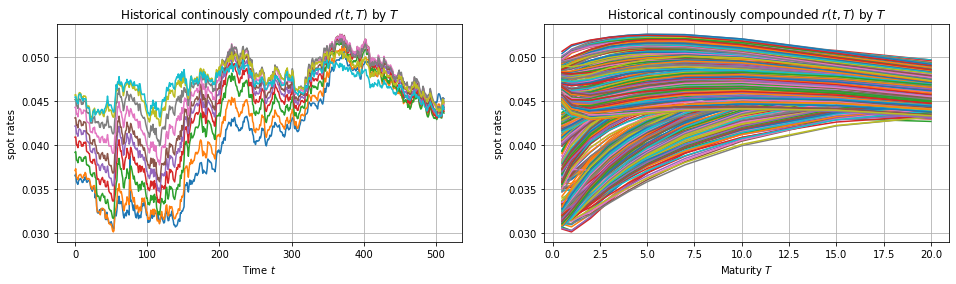

In [4]:
tenors        = [float(x) for x in dataframe.columns]
hist_rates    = np.matrix(dataframe)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(hist_rates)
plt.xlabel(r'Time $t$ ')
plt.title(r'Historical continously compounded $r(t,T)$ by $T$')
plt.grid(True)
plt.ylabel('spot rates')

plt.subplot(122)
plt.plot(tenors, hist_rates.transpose())
plt.xlabel(r'Maturity $T$') 
plt.title(r'Historical continously compounded $r(t,T)$ by $T$')
plt.grid(True)
plt.ylabel('spot rates')
plt.show()

### Differentiate the series of spot rates

In [5]:
hist_rates = np.matrix(dataframe)
diff_rates = np.diff(hist_rates, axis=0)

### Calculate pca's using sklearn library

In [6]:
pca = PCA.PCA(n_components=3)
pca.fit(diff_rates)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

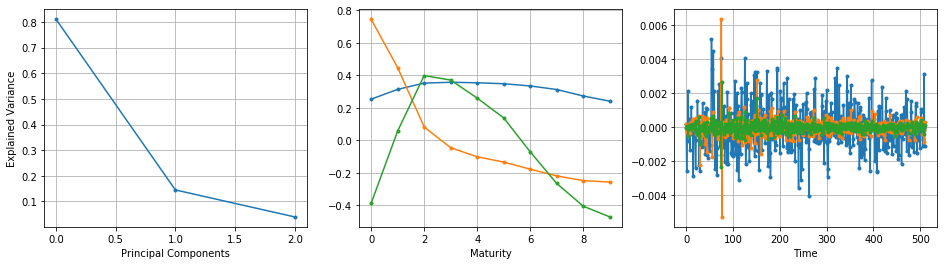

In [7]:
def PlottingVolatilityFactors(dati, xlab, ylab):    
    plt.plot(dati, marker='.')    
    plt.grid(True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1), PlottingVolatilityFactors(pca.explained_variance_ratio_, "Principal Components", "Explained Variance");
plt.subplot(1, 3, 2), PlottingVolatilityFactors(pca.components_[0:3].T, "Maturity", "");
plt.subplot(1, 3, 3), PlottingVolatilityFactors(pca.transform(diff_rates)[:,0:3],  "Time","");
plt.show()

Note that we prefer using minus second component to preserve the upward sloping feature of the curve.

This will not change the result of our analysis.

The -second component is still orthogonal to the other two.

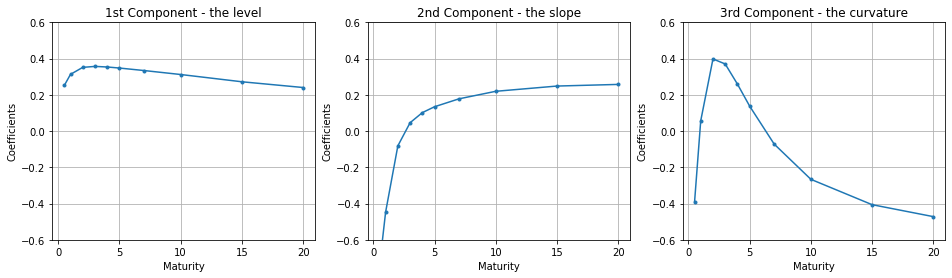

In [8]:
# Note that we are using minus second component. This will not change the result of our analysis.
# The -second component is still orthogonal to the other two.  
def PlottingVolatilityFactors(tenors, dati,xlab, ylab, title):    
    plt.plot(tenors, dati, marker='.')    
    plt.grid(True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    ymin, ymax = -0.6, 0.6
    plt.ylim(ymin, ymax)
    
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1), PlottingVolatilityFactors(tenors, pca.components_[0].T,  "Maturity", "Coefficients", "1st Component - the level");
plt.subplot(1, 3, 2), PlottingVolatilityFactors(tenors, -pca.components_[1].T, "Maturity", "Coefficients", "2nd Component - the slope");
plt.subplot(1, 3, 3), PlottingVolatilityFactors(tenors, pca.components_[2].T,  "Maturity", "Coefficients", "3rd Component - the curvature");
plt.show()

In [9]:
BetasPCA = pd.DataFrame(np.round(pca.components_[0:3],4))
BetasPCA.columns = dataframe.columns
BetasPCA.loc[1] = -BetasPCA.loc[1]
BetasPCA = BetasPCA.rename(index={0: "Level", 1:"Slope", 2:"Curvature"})
BetasPCA

,0.5,1,2,3,4,5,7,10,15,20
Level,0.2526,0.3131,0.3517,0.3569,0.3537,0.3478,0.3342,0.3122,0.2721,0.2404
Slope,-0.7449,-0.4472,-0.0814,0.0461,0.1019,0.1344,0.1781,0.2196,0.2485,0.2575
Curvature,-0.3888,0.0567,0.3981,0.3703,0.2592,0.1374,-0.0718,-0.2663,-0.4062,-0.4721


### Plot two spot curves: last one vs 20 days earlier

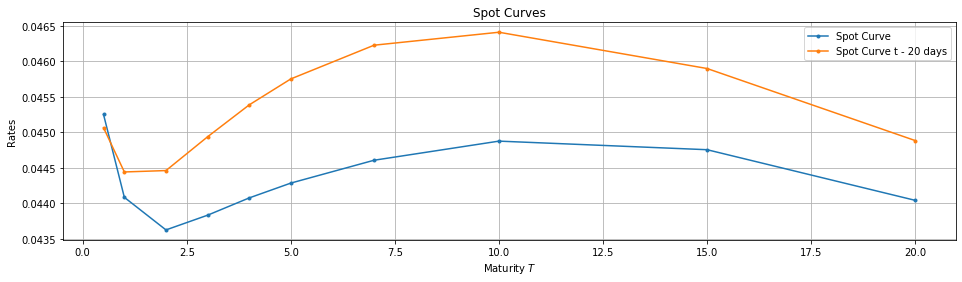

In [10]:
plt.figure(figsize=(16,4))
plt.plot(tenors, hist_rates[-1].transpose(),  marker='.',  label='Spot Curve')
plt.plot(tenors, hist_rates[-20].transpose(), marker='.',  label='Spot Curve t - 20 days')
plt.xlabel(r'Maturity $T$') 
plt.title(r'Spot Curves')
plt.grid(True)
plt.ylabel('Rates')
plt.legend()
plt.show()    

### Fitting

In [11]:
from scipy.interpolate import splrep, splev

def fitting(x, x1, y1):
        ret = splrep(x1, y1)
        return splev(x, ret)

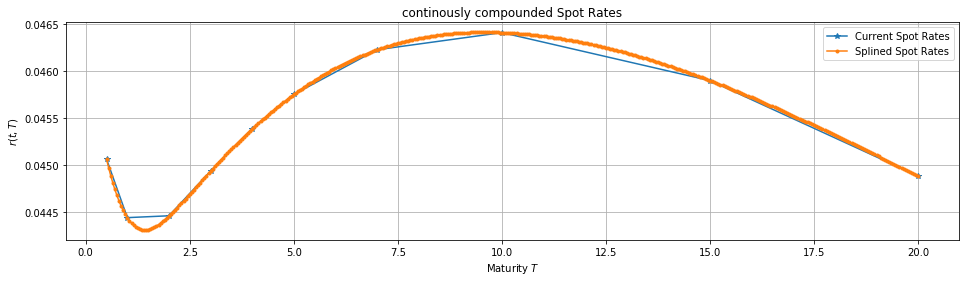

In [12]:
xx_tenors = np.linspace(0.,20,401)
#print(xx_tenors[10:])

def FittingRates(x, tenors, Rates):
    fitted_rates = SplineInterpolator(tenors, Rates)     
    return fitted_rates.fitting(x)


FittedSpotRates = [fitting(x, tenors,hist_rates[-20].transpose()) for x in xx_tenors[10:]]
plt.figure(figsize=(16,4))
plt.plot(tenors,hist_rates[-20].transpose(), marker='*', label='Current Spot Rates')    
plt.plot(xx_tenors[10:], FittedSpotRates,    marker='.', label='Splined Spot Rates')
plt.xlabel(r'Maturity $T$')
plt.ylabel('$r(t,T)$')
plt.title('continously compounded Spot Rates')
plt.grid(True)
plt.legend();

In [13]:
SpotBefore = np.squeeze(np.asarray(hist_rates[-20,:]))
SpotToDay  = np.squeeze(np.asarray(hist_rates[-1,:]))

### The Portfolio: 4.75% coupon bond, with a maturity of 11 years

In [14]:
Time        = [x/2.0 for x in range(1, 23)]
CF          = [0.0475/2.0 for x in range(22)]
CF[-1] +=1 
DF          = [np.exp(-fitting(x, tenors,SpotBefore)*x) for x in Time]
DFToDay     = [np.exp(-fitting(x, tenors,SpotToDay)*x)  for x in Time]
Price       = sum([a*b      for a, b    in zip(DF,CF)])

PriceToDay  = sum([a*b      for a, b    in zip(DFToDay,CF)])
PC1         = [ fitting(x, tenors,pca.components_[0])  for x in Time]
PC2         = [-fitting(x, tenors,pca.components_[1])  for x in Time]
PC3         = [ fitting(x, tenors,pca.components_[2])  for x in Time]

In [15]:
# Duration and Convexity: the price derivative is taken with respect to the contonousy compounded spot rate, 
# so no need to divide by 1+rate/2
Dur         = sum([a*b*c    for a, b, c in zip(DF,CF,Time)])/Price
Conv        = sum([a*b*c**2 for a, b, c in zip(DF,CF,Time)])/Price

Note, we are using the factor duration for the PC's factors

In [16]:
RiskPC1     = sum([a*b*c*d  for a, b, c, d in zip(DF, CF, PC1, Time)])/Price
RiskPC2     = sum([a*b*c*d  for a, b, c, d in zip(DF, CF, PC2, Time)])/Price
RiskPC3     = sum([a*b*c*d  for a, b, c, d in zip(DF, CF, PC3, Time)])/Price

In [17]:
print("the % change in the Price of the CB is ")
print(100*np.round((PriceToDay - Price)/Price,4),"%")

the % change in the Price of the CB is 
1.28 %


In [18]:
Portfolio = pd.DataFrame({'Time': Time, 'DFBefore': DF,'DFToDay':DFToDay,\
                          'Cash Flows':CF, 'PC1':np.round(PC1,3),'PC2':np.round(PC2,3), 'PC3':np.round(PC3,3)}, \
                         columns=['Time','DFBefore', 'DFToDay', 'Cash Flows', 'PC1','PC2','PC3'])
Portfolio

,Time,DFBefore,DFToDay,Cash Flows,PC1,PC2,PC3
0,0.5,0.977720,0.977628,0.02375,0.253,-0.745,-0.389
1,1.0,0.956532,0.956874,0.02375,0.313,-0.447,0.057
2,1.5,0.935690,0.936618,0.02375,0.341,-0.228,0.299
3,2.0,0.914917,0.916449,0.02375,0.352,-0.081,0.398
4,2.5,0.894289,0.896480,0.02375,0.356,0.001,0.408
5,3.0,0.873881,0.876783,0.02375,0.357,0.046,0.370
6,3.5,0.853764,0.857403,0.02375,0.356,0.078,0.318
7,4.0,0.833980,0.838365,0.02375,0.354,0.102,0.259
8,4.5,0.814557,0.819689,0.02375,0.351,0.120,0.198
9,5.0,0.795518,0.801378,0.02375,0.348,0.134,0.137


In [19]:
PortfolioRisks = pd.DataFrame({'Value': 100000000, 'Units': 100000000/Price,\
                               'Price': Price, 'PriceToDay':PriceToDay,\
                               'Dur':[np.round(Dur,3)], 'Conv':[np.round(Conv,3)], \
                               'PC1':[np.round(RiskPC1,3)],'PC2':[np.round(RiskPC2,3)], \
                               'PC3':[np.round(RiskPC3,3)]},\
                              columns=['Value', 'Units','Price','PriceToDay','Dur', 'Conv', 'PC1','PC2','PC3'])
PortfolioRisks

,Value,Units,Price,PriceToDay,Dur,Conv,PC1,PC2,PC3
0,100000000,9.942477e+07,1.005786,1.018681,8.695,87.477,2.701,1.822,-2.138


### The Hedges: 3 ZCBs with maturities of 1, 6 and 10 years

In [20]:
ZCB1 = Portfolio.loc[Portfolio['Time'] ==  0.5]
ZCB2 = Portfolio.loc[Portfolio['Time'] ==  5]
ZCB3 = Portfolio.loc[Portfolio['Time'] ==  10]

ZCB1 = ZCB1.drop(['Cash Flows'], axis=1)
ZCB2 = ZCB2.drop(['Cash Flows'], axis=1)
ZCB3 = ZCB3.drop(['Cash Flows'], axis=1)

frames = [ZCB1, ZCB2, ZCB3]

Hedges = pd.concat(frames)
Hedges

,Time,DFBefore,DFToDay,PC1,PC2,PC3
0,0.5,0.977720,0.977628,0.253,-0.745,-0.389
9,5.0,0.795518,0.801378,0.348,0.134,0.137
19,10.0,0.628700,0.638421,0.312,0.220,-0.266


Note, we are using the factor duration for the PC's factors

In [21]:
Hedges.PC1 = Hedges.PC1*Hedges.Time
Hedges.PC2 = Hedges.PC2*Hedges.Time
Hedges.PC3 = Hedges.PC3*Hedges.Time

Hedges["Dur"] = Hedges["Time"]
Hedges["Conv"] = Hedges["Time"]*Hedges["Time"]
Hedges

,Time,DFBefore,DFToDay,PC1,PC2,PC3,Dur,Conv
0,0.5,0.977720,0.977628,0.1265,-0.3725,-0.1945,0.5,0.25
9,5.0,0.795518,0.801378,1.7400,0.6700,0.6850,5.0,25.00
19,10.0,0.628700,0.638421,3.1200,2.2000,-2.6600,10.0,100.00


#### The units of ZCB1, ZCB2 and ZCB3 to hedge level, slope and curvature of the 4.75% CB

In [22]:
Mat = np.zeros((3,3))
Mat[0:,] = np.array(Hedges.DFBefore*Hedges.PC1)
Mat[1:,] = np.array(Hedges.DFBefore*Hedges.PC2)
Mat[2:,] = np.array(Hedges.DFBefore*Hedges.PC3)

Y = np.zeros(3)
# CB
Y[0] = PortfolioRisks.Price*PortfolioRisks.PC1
Y[1] = PortfolioRisks.Price*PortfolioRisks.PC2
Y[2] = PortfolioRisks.Price*PortfolioRisks.PC3

#print (Mat)
#print (Y)
UnitsPC = np.linalg.inv(Mat).dot(Y)
Hedges["UnitsSold"] = UnitsPC * np.asarray(PortfolioRisks.Units)

In [23]:
Hedges

,Time,DFBefore,DFToDay,PC1,PC2,PC3,Dur,Conv,UnitsSold
0,0.5,0.977720,0.977628,0.1265,-0.3725,-0.1945,0.5,0.25,8.502681e+06
9,5.0,0.795518,0.801378,1.7400,0.6700,0.6850,5.0,25.00,9.969514e+06
19,10.0,0.628700,0.638421,3.1200,2.2000,-2.6600,10.0,100.00,1.301264e+08


In [24]:
# Value of the Hedges
print ("Value of the Hedges:",np.round(np.sum(Hedges.DFBefore*Hedges.UnitsSold),0))

# The Hedges Value has changed by 
HedgingDeltaValue = -np.round(np.sum(Hedges.DFToDay*Hedges.UnitsSold) - np.sum(Hedges.DFBefore*Hedges.UnitsSold),0)
print("The Hedges Value has changed by:", HedgingDeltaValue)

# The Portfolio Value has changed by 
PortfolioDeltaValue =  np.asarray((np.round(PortfolioRisks.Units * (PortfolioRisks.PriceToDay - PortfolioRisks.Price),0)))
print ("The Portfolio (long) Value has changed by:", PortfolioDeltaValue[0])

# or a gain loss of
GainLoss = PortfolioDeltaValue[0] + HedgingDeltaValue
print ("The gain or loss of the Hedged Portfolio is:", GainLoss) 

# We can also map the loss into a Portfolio Price change as follows
print("The Original Price of the Only Long position was:", np.round(np.asarray(PortfolioRisks.Price)[0],4))

NewPrice = np.asarray(PortfolioRisks.Price)[0] * (1+GainLoss/np.asarray(PortfolioRisks.Value)[0])

print("The Current Price of the hedged position is now: ", np.round(NewPrice,4))

Value of the Hedges: 98054602.0
The Hedges Value has changed by: -1322654.0
The Portfolio (long) Value has changed by: 1282086.0
The gain or loss of the Hedged Portfolio is: -40568.0
The Original Price of the Only Long position was: 1.0058
The Current Price of the hedged position is now:  1.0054


#### So after hedging level, slope and curvature of the long position with three ZCBs, the result is very good!

#### Let's write all into a dataframe 

In [25]:
ReportPortfolio = np.zeros((1,6))
ReportPortfolio[0,0] = 100000000
ReportPortfolio[0,1] = PortfolioDeltaValue[0]
ReportPortfolio[0,2] = np.round(np.sum(Hedges.DFBefore*Hedges.UnitsSold),0)
ReportPortfolio[0,3] = HedgingDeltaValue
ReportPortfolio[0,4] = GainLoss
ReportPortfolio[0,5] = np.round(NewPrice,4)

ReportPortfolio = pd.DataFrame(ReportPortfolio)

ReportPortfolio.columns = ['Initial Value of Long','Delta Long', 'Initial Value of Hedges','Delta of Hedges', 'Gain Loss', 'New Price']
(ReportPortfolio)

,Initial Value of Long,Delta Long,Initial Value of Hedges,Delta of Hedges,Gain Loss,New Price
0,100000000.0,1282086.0,98054602.0,-1322654.0,-40568.0,1.0054


### Hedging duration and convexity of the 4.75% CB

#### We ony need two bonds. We keep the the ZCB with 10 yr maturity and use each the other two bonds to check the combination with the best hedging results

In [26]:
Report = np.zeros((2,5))
for j, i in enumerate(Hedges.Time[0:2]):
    Report[j,0] = i
    HedgesDur = Hedges.loc[Hedges['Time'] !=  i]
    #print (HedgesDur)

    MatDur = np.zeros((2,2))
    MatDur[0:,] = np.array(HedgesDur.DFBefore*HedgesDur.Dur)
    MatDur[1:,] = np.array(HedgesDur.DFBefore*HedgesDur.Conv)
    YDur = np.zeros(2)
    # CB
    YDur[0] = PortfolioRisks.Price*PortfolioRisks.Dur
    YDur[1] = PortfolioRisks.Price*PortfolioRisks.Conv

    UnitsSoldDur = np.linalg.inv(MatDur[:,0:2]).dot(YDur)
    HedgesDur["UnitsSoldDur"] = UnitsSoldDur * np.asarray(PortfolioRisks.Units)

    # Value of the Hedging Positions
    #print (np.round(np.sum(HedgesDur.DFBefore*HedgesDur.UnitsSoldDur),0))

    Report[j,1] = np.round(np.sum(HedgesDur.DFBefore*HedgesDur.UnitsSoldDur),0)
    
    # The Hedges Value has changed by 
    HedgingDurDeltaValue = -np.round(np.sum(HedgesDur.DFToDay*HedgesDur.UnitsSoldDur) - \
                                     np.sum(HedgesDur.DFBefore*HedgesDur.UnitsSoldDur),0)
    #print(HedgingDurDeltaValue)
    
    Report[j,2] = np.round(HedgingDurDeltaValue,0)
    
    # The Portfolio Value has changed by 
    PortfolioDeltaValue =  np.asarray((np.round(PortfolioRisks.Units * (PortfolioRisks.PriceToDay - PortfolioRisks.Price),0)))
    #print (PortfolioDeltaValue[0])


    # or a gain loss of
    GainLossDur = PortfolioDeltaValue[0] + HedgingDurDeltaValue
    #print (GainLossDur) 
    Report[j,3] = GainLossDur
    
    # We can also map the loss into a Portfolio Price change as follows
    #print("Before the price was: ", np.round(np.asarray(PortfolioRisks.Price)[0],4))

    NewPriceDur = np.asarray(PortfolioRisks.Price)[0] * (1+GainLossDur/np.asarray(PortfolioRisks.Value)[0])

    #print("Now the price is:     ", np.round(NewPriceDur,4))
    
    Report[j,4] = np.round(NewPriceDur,4)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [27]:
Report = pd.DataFrame(Report)
Report.columns = ['Not Included: ZCB with Mat', 'Initial Value of Hedges', 'Delta of Hedges', 'Gain Loss', 'New Price']
Report

,Not Included: ZCB with Mat,Initial Value of Hedges,Delta of Hedges,Gain Loss,New Price
0,0.5,85896000.0,-1345245.0,-63159.0,1.0052
1,5.0,76410000.0,-1354090.0,-72004.0,1.0051


In [28]:
(ReportPortfolio)

,Initial Value of Long,Delta Long,Initial Value of Hedges,Delta of Hedges,Gain Loss,New Price
0,100000000.0,1282086.0,98054602.0,-1322654.0,-40568.0,1.0054


#### Hedging with PC's is a far better hedging strategy! However, we have to short sell a much larger position of ZCBs compared with hedging duration and convexity

### Running Regressions 

Let's check now that we are doing exactly the following:

$$\Delta r_1(t) =\alpha_1 + \beta_{1,1}\Delta\phi_1^{PCA}(t) + \epsilon_1(t) $$
$$\Delta r_2(t) =\alpha_2 + \beta_{2,1}\Delta\phi_1^{PCA}(t) + \epsilon_2(t) $$
$$...$$
$$...$$
$$\Delta r_n(t) =\alpha_n + \beta_{n,1}\Delta\phi_1^{PCA}(t) + \epsilon_n(t) $$

Here is again the 1st component

In [29]:
pca.components_[0]

array([0.25261981, 0.31312605, 0.35165691, 0.3569194 , 0.35368718,
       0.3478456 , 0.33417857, 0.31218563, 0.2721193 , 0.24042877])

Let's project the changes on the $level(t)$, $\Delta\phi_1^{PCA}(t)$
$$\Delta\phi_1^{PCA}(t) = \sum_{i=1}^n v_{i,k}\Delta r_k(t)$$

In [30]:
projected_data = np.dot(diff_rates, pca.components_[0]).T
print (projected_data.shape)

(511, 1)


In [31]:
sizeR      = diff_rates.shape[0]
Sizetenors = diff_rates.shape[1]

We build a matrix to run the following regression:
$$\Delta r_1(t) =\alpha_1 + \beta_{1,1}\Delta\phi_1^{PCA}(t) + \epsilon_1(t) $$
$$\Delta r_2(t) =\alpha_2 + \beta_{2,1}\Delta\phi_1^{PCA}(t) + \epsilon_2(t) $$
$$...$$
$$...$$
$$\Delta r_n(t) =\alpha_n + \beta_{n,1}\Delta\phi_1^{PCA}(t) + \epsilon_n(t) $$

In [32]:
XX   = np.zeros((sizeR*Sizetenors, Sizetenors*2))
Ones = np.ones((sizeR,1))
Ones = Ones.reshape((Ones.shape[0],)) 
YY   =  np.zeros((sizeR*Sizetenors,1))

In [33]:
for i in range(0, Sizetenors):
    XX[i*sizeR:(i+1)*sizeR,i*2]= Ones
    
    Proj = projected_data[:,0].reshape((projected_data[:,0].shape[0],)) 
    XX[i*sizeR:(i+1)*sizeR,i*2+1]= Proj
    
    diff = diff_rates[:,i].reshape((diff_rates[:,i].shape[0],)) 
    YY[i*sizeR:(i+1)*sizeR,0] = diff

In [34]:
print (XX.shape)
print (YY.shape)

(5110, 20)
(5110, 1)


In [35]:
results = sm.OLS(YY, XX).fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1146.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:35:23   Log-Likelihood:                 36222.
No. Observations:                5110   AIC:                        -7.240e+04
Df Residuals:                    5090   BIC:                        -7.227e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.334e-05   8.95e-06      1.490      0.1

and let's compare the $\beta's$ with the first principal component

In [36]:
for j, i in enumerate(range(1,20,2)):
    print (np.round(results.params[i],3)," : ", np.round(pca.components_[0,j],3))

0.253  :  0.253
0.313  :  0.313
0.352  :  0.352
0.357  :  0.357
0.354  :  0.354
0.348  :  0.348
0.334  :  0.334
0.312  :  0.312
0.272  :  0.272
0.24  :  0.24


In [37]:
resid = np.asarray(results.resid)
print (resid.shape)
epsilons = resid.reshape(sizeR,Sizetenors, order='F')
print(epsilons.shape)

(5110,)
(511, 10)


Let's check now that we are doing excatly the following for the second component:

$$\Delta r_1(t) =\alpha_1 + \beta_{1,1}\Delta\phi_1^{PCA}(t) + \beta_{1,2}\Delta\phi_2^{PCA}(t) + \epsilon_1(t) $$
$$\Delta r_2(t) =\alpha_2 + \beta_{2,1}\Delta\phi_1^{PCA}(t) + \beta_{2,2}\Delta\phi_2^{PCA}(t) + \epsilon_2(t) $$
$$...$$
$$...$$
$$\Delta r_n(t) =\alpha_n + \beta_{n,1}\Delta\phi_1^{PCA}(t) + \beta_{n,2}\Delta\phi_2^{PCA}(t) + \epsilon_n(t) $$

Let's project the changes on the $slope(t)$ $\Delta\phi_2^{PCA}(t)$:

$$\Delta\phi_2^{PCA}(t) = \sum_{i=1}^n v_{i,k}\epsilon_k(t)$$

In [38]:
# Note we are using the negative of the second component
projected_data_epsilon = np.dot(epsilons, -pca.components_[1]).T
projected_data_epsilon = projected_data_epsilon.reshape(sizeR,1)
print (projected_data_epsilon.shape)

(511, 1)


In [39]:
XX  = np.zeros((sizeR*Sizetenors,Sizetenors*3))
Ones = np.ones((sizeR,1))
Ones = Ones.reshape((Ones.shape[0],)) 
YY  = np.zeros((sizeR*Sizetenors,1))

for i in range(0, Sizetenors):
    XX[i*sizeR:(i+1)*sizeR,i*3]= Ones

    Proj1 = projected_data[:,0].reshape((projected_data[:,0].shape[0],)) 
    XX[i*sizeR:(i+1)*sizeR,i*3+1]= Proj1
    
    Proj2 = projected_data_epsilon[:,0].reshape((projected_data_epsilon[:,0].shape[0],))
    XX[i*sizeR:(i+1)*sizeR,i*3+2]= Proj2   

    diff = diff_rates[:,i].reshape((diff_rates[:,i].shape[0],)) 
    YY[i*sizeR:(i+1)*sizeR,0] = diff

In [40]:
results = sm.OLS(YY, XX).fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3761.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:35:24   Log-Likelihood:                 39923.
No. Observations:                5110   AIC:                        -7.979e+04
Df Residuals:                    5080   BIC:                        -7.959e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.334e-05   4.34e-06      3.071      0.0

and let's compare the $\beta's$ with the second principal component

In [41]:
for j, i in enumerate(range(2,30,3)):
    print (np.round(results.params[i],3)," : ", -np.round(pca.components_[1,j],3))

-0.745  :  -0.745
-0.447  :  -0.447
-0.081  :  -0.081
0.046  :  0.046
0.102  :  0.102
0.134  :  0.134
0.178  :  0.178
0.22  :  0.22
0.248  :  0.248
0.258  :  0.258


In [42]:
resid = np.asarray(results.resid)
print (resid.shape)
epsilons = resid.reshape(sizeR,Sizetenors, order='F')
print(epsilons.shape)

(5110,)
(511, 10)


In [43]:
projected_data_epsilon2 = np.dot(epsilons, pca.components_[2]).T
projected_data_epsilon2 = projected_data_epsilon2.reshape(sizeR,1)
print (projected_data_epsilon2.shape)

(511, 1)


In [44]:
XX = np.zeros((sizeR*Sizetenors,Sizetenors*4))
Ones = np.ones((sizeR,1))
Ones = Ones.reshape((Ones.shape[0],)) 
YY =  np.zeros((sizeR*Sizetenors,1))

for i in range(0, Sizetenors):
    XX[i*sizeR:(i+1)*sizeR,i*4]= Ones

    Proj1 = projected_data[:,0].reshape((projected_data[:,0].shape[0],)) 
    XX[i*sizeR:(i+1)*sizeR,i*4+1]= Proj1
    
    Proj2 = projected_data_epsilon[:,0].reshape((projected_data_epsilon[:,0].shape[0],))
    XX[i*sizeR:(i+1)*sizeR,i*4+2]= Proj2   

    Proj3 = projected_data_epsilon2[:,0].reshape((projected_data_epsilon2[:,0].shape[0],))
    XX[i*sizeR:(i+1)*sizeR,i*4+3]= Proj3   
    
    diff = diff_rates[:,i].reshape((diff_rates[:,i].shape[0],)) 
    YY[i*sizeR:(i+1)*sizeR,0] = diff

In [45]:
results = sm.OLS(YY, XX).fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.710e+04
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:35:25   Log-Likelihood:                 45627.
No. Observations:                5110   AIC:                        -9.117e+04
Df Residuals:                    5070   BIC:                        -9.091e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.334e-05   1.42e-06      9.368      0.0

and finally let's compare all $\beta's$ with all principal components

In [46]:
betas   = results.params.reshape(4,Sizetenors, order = 'F')
BetasDF = pd.DataFrame(np.round(betas,4))
BetasDF.columns = dataframe.columns

BetasDF = BetasDF.drop(BetasDF.index[0])
BetasDF = BetasDF.rename(index={1: "Level", 2:"Slope", 3:"Curvature"})
(BetasDF)

,0.5,1,2,3,4,5,7,10,15,20
Level,0.2526,0.3131,0.3517,0.3569,0.3537,0.3478,0.3342,0.3122,0.2721,0.2404
Slope,-0.7449,-0.4472,-0.0814,0.0461,0.1019,0.1344,0.1781,0.2196,0.2485,0.2575
Curvature,-0.3888,0.0567,0.3981,0.3703,0.2592,0.1374,-0.0718,-0.2663,-0.4062,-0.4721


In [47]:
BetasPCA = pd.DataFrame(np.round(pca.components_[0:3],4))
BetasPCA.columns = dataframe.columns
BetasPCA.loc[1] = -BetasPCA.loc[1]
BetasPCA = BetasPCA.rename(index={0: "Level", 1:"Slope", 2:"Curvature"})
BetasPCA

,0.5,1,2,3,4,5,7,10,15,20
Level,0.2526,0.3131,0.3517,0.3569,0.3537,0.3478,0.3342,0.3122,0.2721,0.2404
Slope,-0.7449,-0.4472,-0.0814,0.0461,0.1019,0.1344,0.1781,0.2196,0.2485,0.2575
Curvature,-0.3888,0.0567,0.3981,0.3703,0.2592,0.1374,-0.0718,-0.2663,-0.4062,-0.4721


The end